In [1]:
from manim import *
from numpy import linalg as npl
import matplotlib.pyplot as plt
import jupyter_capture_output
from scipy.interpolate import make_interp_spline, BSpline

video_scene = " -v WARNING --progress_bar None --disable_caching li_Scene"
image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s li_Scene"

Manim Community v0.16.0.post0

Jupyter Capture Output v0.0.8


In [9]:
from numpy import arctan2


def F1(r):
    r = r / 2
    x = np.sin(r[1])
    y = np.cos(r[0]) + r[1] / 4
    return x * RIGHT + y * UP


def gamma1(t):
    x = t / 2 - 2 * np.sin(t) 
    y = -t / 5 
    return np.array([x, y, 0])


def dgamma1(t):
    return (gamma1(t+0.01) - gamma1(t)) / 0.01 + 0.01


def F1_gamma(t):
    r = gamma1(t)
    r = r * 2
    x = np.sin(r[1])
    y = np.cos(r[0]) + r[1] / 4
    return np.array([x, y, 0]) * 2


def F_dot_dgamma(t):
    return np.dot(F1_gamma(t), dgamma1(t))


def angle(v1, v2):
    v1_abs = npl.norm(v1)
    v2_abs = npl.norm(v2)
    angle = arctan2(np.dot(v1, v2), v1[0]*v2[1]-v1[1]*v2[0])
    return angle


t0 = -4
t1 = 4


# Max-R
t_array = np.linspace(t0, t1, 10000)
max_dgamma1_norm = max([npl.norm(dgamma1(t))] for t in t_array)
max_F1_gamma_norm = max([npl.norm(F1_gamma(t))] for t in t_array)
max_r = max([max_dgamma1_norm, max_F1_gamma_norm])[0]/3

max_r, dgamma1(t0), F1_gamma(t0), F_dot_dgamma(t0)

(1.1363828396931506,
 array([ 1.82483342, -0.19      ,  0.01      ]),
 array([1.99914721, 2.27149759, 0.        ]),
 3.2165260818321286)

Output saved by overwring previous file at animations/line_integration/line_integration.mp4.


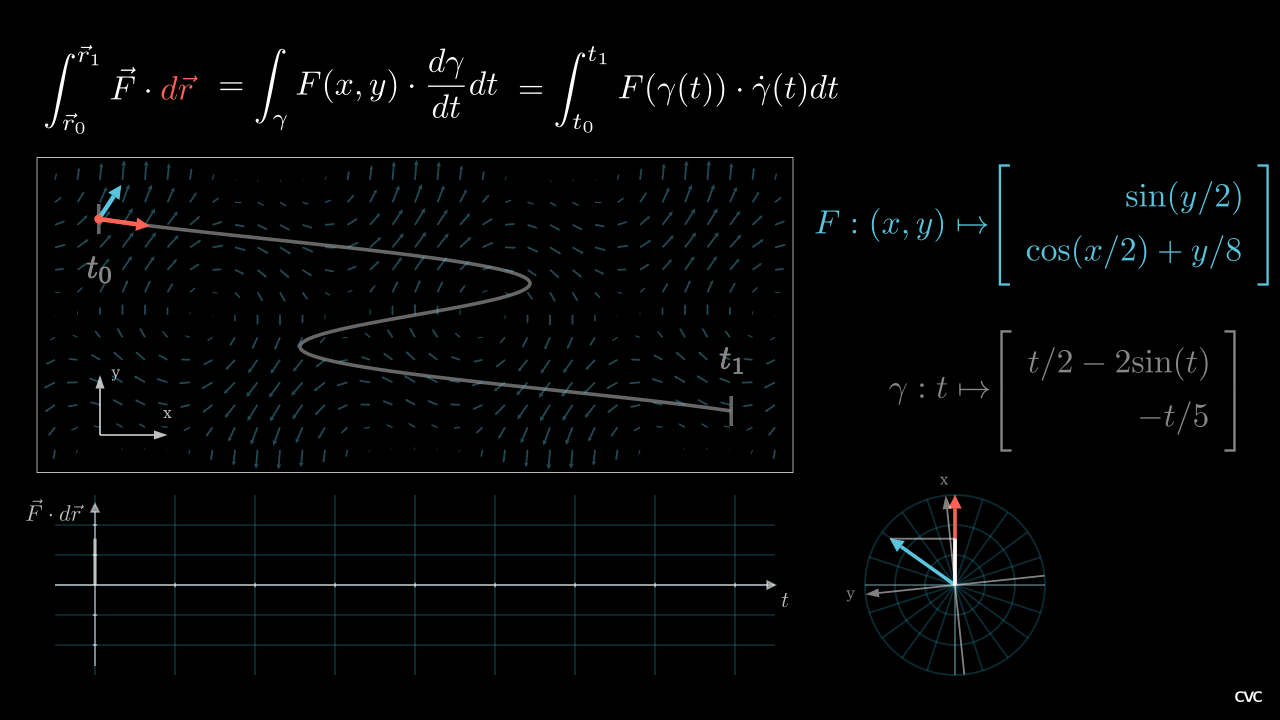

In [24]:
%%capture_video --path "animations/line_integration/line_integration.mp4"
%%manim -qm --fps 20 $video_scene

# Integration Animation
class li_Scene(Scene):
    def construct(self):
        CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)

        # Equations
        F_eq1 = MathTex(r'F: (x, y)\mapsto', font_size = 36, color = BLUE).align_on_border(LEFT).align_on_border(RIGHT, buff = 3.25).shift(1.5*UP)
        F_vec = Matrix([[r'\mathrm{sin}(y/2)'], [r'\mathrm{cos}(x/2)+y/8']]).scale(0.75).next_to(F_eq1, RIGHT*0.5).set_color(BLUE)
        F_eq = VGroup(F_eq1, F_vec)

        gamma_eq1 = MathTex(r'\gamma: t\mapsto', font_size = 36, color = GREY).next_to(F_eq1[0][6], 6*DOWN)
        gamma_vec = Matrix([[r't/2-2\mathrm{sin}(t)'], [r'-t/5']]).scale(0.75).next_to(gamma_eq1, RIGHT*0.5).set_color(GREY)
        gamma_eq = VGroup(gamma_eq1, gamma_vec)

        li_eq1 = MathTex(r'\int_{\Vec{r}_0}^{\Vec{r}_1}\Vec{F}\cdot d\Vec{r}', font_size = 36).align_on_border(UP + LEFT, buff = 0.5)
        li_eq1[0][10:13].set_color(RED)
        li_eq2 = MathTex(r'=\int_{\gamma}F(x, y)\cdot\frac{d\gamma}{dt}dt', font_size = 36).next_to(li_eq1, RIGHT)
        li_eq3 = MathTex(r'=\int_{t_0}^{t_1}F(\gamma(t))\cdot\dot{\gamma}(t)dt', font_size = 36).next_to(li_eq2, RIGHT)

        box_gamma = SurroundingRectangle(li_eq2[0][2], buff = .1, color = GREY)
        box_F = SurroundingRectangle(li_eq2[0][3:9], buff = .1, color = BLUE)
        box_t0 = SurroundingRectangle(li_eq3[0][4:6], buff = .1, color = GREY)
        box_t1 = SurroundingRectangle(li_eq3[0][2:4], buff = .1, color = GREY)
        box_dgamma = SurroundingRectangle(li_eq3[0][14:19], buff = .1, color = RED)
        box_Fgamma = SurroundingRectangle(li_eq3[0][6:13], buff = .1, color = BLUE)
        box_F_dot_dgamma = SurroundingRectangle(li_eq3[0][6:19], buff = .1, color = WHITE)


        # Field
        ax = Axes(x_range = [-4, 4, 1], y_range = [-1.5, 1.5, 1], x_length = 8, y_length = 4).set_opacity(0.5)
        gamma_curve = ax.plot_parametric_curve(gamma1, t_range = [t0, t1], stroke_opacity = 0.75, color = GREY)
        t0_line = Line(
            start = ax.coords_to_point(gamma1(t0)[0], gamma1(t0)[1] - 0.125, 0), 
            end = ax.coords_to_point(gamma1(t0)[0], gamma1(t0)[1] + 0.125, 0), stroke_opacity = 0.75, color = GREY)
        t1_line = Line(
            start = ax.coords_to_point(gamma1(t1)[0], gamma1(t1)[1] - 0.125, 0), 
            end = ax.coords_to_point(gamma1(t1)[0], gamma1(t1)[1] + 0.125, 0), stroke_opacity = 0.75, color = GREY)
        r0_label = MathTex(r'r_0', font_size = 36, stroke_width = 1, color = GREY).next_to(t0_line, DOWN)
        r1_label = MathTex(r'r_1', font_size = 36, stroke_width = 1, color = GREY).next_to(t1_line, UP)
        t0_label = MathTex(r't_0', font_size = 36, stroke_width = 1, color = GREY).next_to(t0_line, DOWN)
        t1_label = MathTex(r't_1', font_size = 36, stroke_width = 1, color = GREY).next_to(t1_line, UP)
        traj = VGroup(gamma_curve, t0_line, t1_line)

        avf = ArrowVectorField(
            F1, x_range = [-16, 16, 1], y_range = [-6, 6, 1], length_func = lambda x: x/2, 
            colors = [BLUE], opacity = 0.375, vector_config = {'stroke_width': 2}).scale(0.25)
        rect = Rectangle(width = 8.4, height = 3.5, stroke_width = 0.75)
        ax = Axes(x_range = [-4, 4, 1], y_range = [-1.5, 1.5, 1], x_length = 8, y_length = 4).set_opacity(0.5)
        ax_x_ax = Line(ax.c2p(-3.5, -1), ax.c2p(-2.75, -1), color = WHITE, stroke_width = 2).add_tip(tip_length = 0.15, tip_width = 0.1).set_opacity(0.75) 
        ax_y_ax = Line(ax.c2p(-3.5, -1), ax.c2p(-3.5, -0.5), color = WHITE, stroke_width = 2).add_tip(tip_length = 0.15, tip_width = 0.1).set_opacity(0.75) 
        ax_x_label = Text('x', font_size = 12).move_to(ax.c2p(-2.75, -0.825)).set_opacity(0.75) 
        ax_y_label = Text('y', font_size = 12).move_to(ax.c2p(-3.325, -0.5)).set_opacity(0.75)
        avf_coord = VGroup(ax_x_ax, ax_y_ax, ax_x_label, ax_y_label)
        field = VGroup(ax, avf_coord, traj, avf, rect, t0_label, t1_label).shift(2.5*LEFT + 0.5*UP)
        


        # Coordinate Systems
        npla = NumberPlane(
            x_range = [-4.5, 4.5, 1], y_range = [-3, 3, 1], x_length = 8, y_length = 2, axis_config = {"include_numbers": False, "stroke_opacity": 0.25}, 
            background_line_style = {"stroke_opacity": 0.25}, y_axis_config = {"stroke_opacity": 0.25, "stroke_width": 0.25, "stroke_color": TEAL}).shift(2.5*LEFT + 2.5*DOWN)
        ax_npla = Axes(x_range = [-0.5, 8.5, 1], y_range = [-3*0.9, 3*0.9, 1], x_length = 8*4, y_length = 2*0.9*4, tips = True).set_opacity(0.5).shift(2.5*LEFT + 2.5*DOWN).scale(0.25)
        x_npla = MathTex(r't', font_size = 24).move_to(npla.c2p(4.625, -0.5, 1)).set_opacity(0.75)
        y_npla = MathTex(r'\Vec{F}\cdot d\Vec{r}', font_size = 24).move_to(npla.c2p(-4.5, 2.5, 1)).set_opacity(0.75)
        npla_ax = VGroup(npla, ax_npla, x_npla, y_npla)

        ppla = PolarPlane(
            radius_max = 3, size = 2, azimuth_offset = PI/2, x_axis_config = {"stroke_opacity": 0.25}, y_axis_config = {"stroke_opacity": 0.25}, 
            background_line_style = {"stroke_opacity": 0.25}).shift(2.5*DOWN + 3.5*RIGHT)        
        
        
        # Vector Animation Setup
        pol_center = ppla.pr2pt(0, 0)
        pol_dgv_len = npl.norm(dgamma1(t0)) / max_r
        pol_F_len = npl.norm(F1_gamma(t0)) / max_r
        pol_F_tip = ppla.pr2pt(pol_F_len, angle(F1_gamma(t0), dgamma1(t0)))

        pol_x_start = ppla.pr2pt(-3, angle([1, 0, 0], dgamma1(t0)))
        pol_x_end = ppla.pr2pt(3, angle([1, 0, 0], dgamma1(t0)))

        pol_y_start = ppla.pr2pt(-3, angle([0, 1, 0], dgamma1(t0)))
        pol_y_end = ppla.pr2pt(3, angle([0, 1, 0], dgamma1(t0)))

        traj_dot = Dot(ax.c2p(gamma1(t0)[0], gamma1(t0)[1]), radius = 0.05, color = RED)
        traj_arrow = Line(
            start = ax.c2p(gamma1(t0)[0], gamma1(t0)[1]), 
            end = ax.c2p(gamma1(t0)[0] + dgamma1(t0)[0] / 2 / pol_dgv_len, gamma1(t0)[1] + dgamma1(t0)[1] / 2 / pol_dgv_len), 
            color = RED, buff = 0, stroke_width = 5).add_tip(tip_length = 0.15, tip_width = 0.15)
        traj_dgv = VGroup(traj_dot, traj_arrow)
        F_arrow = Line(
            start = ax.c2p(gamma1(t0)[0], gamma1(t0)[1]), 
            end = ax.c2p(gamma1(t0)[0] + F1_gamma(t0)[0] / 8, gamma1(t0)[1] + F1_gamma(t0)[1] / 8), 
            color = BLUE, buff = 0, stroke_width = 5).add_tip(tip_length = 0.15, tip_width = 0.15)

        traj_dot_start = Dot(ax.c2p(gamma1(t0)[0], gamma1(t0)[1]), radius = 0.05, color = RED)
        traj_arrow_start = Line(
            start = ax.c2p(gamma1(t0)[0], gamma1(t0)[1]), 
            end = ax.c2p(gamma1(t0)[0] + dgamma1(t0)[0] / 2 / pol_dgv_len, gamma1(t0)[1] + dgamma1(t0)[1] / 2 / pol_dgv_len), 
            color = RED, buff = 0, stroke_width = 5).add_tip(tip_length = 0.15, tip_width = 0.15)
        traj_dgv_start = VGroup(traj_dot_start, traj_arrow_start)
        F_arrow_start = Line(
            start = ax.c2p(gamma1(t0)[0], gamma1(t0)[1]), 
            end = ax.c2p(gamma1(t0)[0] + F1_gamma(t0)[0] / 8, gamma1(t0)[1] + F1_gamma(t0)[1] / 8), 
            color = BLUE, buff = 0, stroke_width = 5).add_tip(tip_length = 0.15, tip_width = 0.15)


        # Polar Animation
        pol_dgv = Line(pol_center, ppla.pr2pt(3, PI/2), color = RED, stroke_width = 4).add_tip(tip_length = 0.15, tip_width = 0.15)
        pol_F = Line(pol_center, pol_F_tip, color = BLUE, stroke_width = 4).add_tip(tip_length = 0.15, tip_width = 0.15) 

        x_line = Line(pol_x_start, pol_x_end, color = WHITE, stroke_width = 2).add_tip(tip_length = 0.15, tip_width = 0.1).set_opacity(0.5) 
        y_line = Line(pol_y_start, pol_y_end, color = WHITE, stroke_width = 2).add_tip(tip_length = 0.15, tip_width = 0.1).set_opacity(0.5)  
        x_label = Text('x', font_size = 12).move_to(ppla.pr2pt(3.5, angle([1, 0, 0], dgamma1(t0)))).set_opacity(0.5) 
        y_label = Text('y', font_size = 12).move_to(ppla.pr2pt(3.5, angle([0, 1, 0], dgamma1(t0)))).set_opacity(0.5)
        pol_cart_coord = VGroup(x_line, y_line, x_label, y_label) 

        v_bar = Line(pol_center, [ppla.pr2pt(0, 0)[0], pol_F_tip[1], 0], color = WHITE, stroke_width = 4)
        h_bar = Line(pol_F_tip, [ppla.pr2pt(0, 0)[0], pol_F_tip[1], 0], color = WHITE, stroke_width = 2).set_opacity(0.5)
        pol_proj = VGroup(v_bar, h_bar)


        # Cart Animation
        F_dot_dgamma_func = npla.plot(lambda t_var: F_dot_dgamma(t_var) / npl.norm(dgamma1(t_var))/ max_r, color = WHITE, x_range = [t0, t0])
        F_dot_dgamma_area = npla.get_area(F_dot_dgamma_func, [t0, t1], bounded_graph = npla.plot(lambda t_var: 0, x_range = [t0, t0]), color = WHITE, opacity = 0.5)
        cart_proj= VGroup(F_dot_dgamma_func, F_dot_dgamma_area)
        

        # Vector Animation
        def dgv_updater(v):
            t = time.get_value()

            gamma1_t = gamma1(t)
            dgamma1_t = dgamma1(t)
            dgv_len = npl.norm(dgamma1_t) / max_r
            #print(f"Norm (dgamma1 / dgv_len) {npl.norm(dgamma1_t / dgv_len)}")

            dot_new = Dot(ax.c2p(gamma1_t[0], gamma1_t[1]), radius = 0.05, color = RED)
            arrow_new = Line(
                start = ax.c2p(gamma1_t[0], gamma1_t[1]), 
                #end = ax.c2p(gamma1_t[0] + dgamma1_t[0] / 2 / dgv_len, gamma1_t[1] + dgamma1_t[1] / 2 / dgv_len), 
                end = ax.c2p((gamma1_t + dgamma1_t / dgv_len / 2)[0], (gamma1_t + dgamma1_t / dgv_len / 2)[1]),
                color = RED, stroke_width = 4, buff = 0).add_tip(tip_length = 0.15, tip_width = 0.15)
            dgv_new = VGroup(dot_new, arrow_new)
            if t == t1:
                self.remove(v)
            else:
                v.become(dgv_new)

        def F_updater(v):
            t = time.get_value()

            F1_gamma_t = F1_gamma(t)
            gamma1_t = gamma1(t)

            F_arrow_new = Line(
                start = ax.c2p(gamma1_t[0], gamma1_t[1]), 
                end = ax.c2p(gamma1_t[0] + F1_gamma_t[0] / 8, gamma1_t[1] + F1_gamma_t[1] / 8), 
                color = BLUE, stroke_width = 4, buff = 0).add_tip(tip_length = 0.15, tip_width = 0.15)
            if t == t1:
                self.remove(v)
            else:
                v.become(F_arrow_new)


        # Polar Animation
        def pol_dgv_updater(v):
            t = time.get_value()
            new_pol_dgv = Line(pol_center, ppla.pr2pt(3, PI/2), color = RED, stroke_width = 4).add_tip(tip_length = 0.15, tip_width = 0.15)
            v.become(new_pol_dgv)

        def pol_F_updater(v):
            t = time.get_value()
            new_pol_F = Line(
                pol_center, ppla.pr2pt(npl.norm(F1_gamma(t)) / max_r, angle(F1_gamma(t), dgamma1(t))), 
                color = BLUE, stroke_width = 4).add_tip(tip_length = 0.15, tip_width = 0.15) 
            v.become(new_pol_F)

        def x_line_updater(v):
            t = time.get_value()
            new_x_line = Line(
                ppla.pr2pt(-3, angle([1, 0, 0], dgamma1(t))), ppla.pr2pt(3, angle([1, 0, 0], dgamma1(t))), 
                color = WHITE, stroke_width = 2).add_tip(tip_length = 0.1, tip_width = 0.1).set_opacity(0.5) 
            v.become(new_x_line) 
        
        def y_line_updater(v):
            t = time.get_value()
            new_y_line = Line(
                ppla.pr2pt(-3, angle([0, 1, 0], dgamma1(t))), ppla.pr2pt(3, angle([0, 1, 0], dgamma1(t))), 
                color = WHITE, stroke_width = 2).add_tip(tip_length = 0.1, tip_width = 0.1).set_opacity(0.5) 
            v.become(new_y_line) 

        def x_label_updater(label):
            t = time.get_value()
            x_label_new = Text('x', font_size = 12).move_to(ppla.pr2pt(3.5, angle([1, 0, 0], dgamma1(t)))).set_opacity(0.5) 
            label.become(x_label_new)

        def y_label_updater(label):
            t = time.get_value()
            y_label_new = Text('y', font_size = 12).move_to(ppla.pr2pt(3.5, angle([0, 1, 0], dgamma1(t)))).set_opacity(0.5) 
            label.become(y_label_new)

        def v_bar_updater(bar):
            t = time.get_value()

            F1_gamma_t = F1_gamma(t)
            dgamma1_t = dgamma1(t)

            new_v_bar = Line(pol_center, [ppla.pr2pt(0, 0)[0], ppla.pr2pt(npl.norm(F1_gamma_t) / max_r, angle(F1_gamma_t, dgamma1_t))[1], 0], color = WHITE, stroke_width = 4)
            bar.become(new_v_bar)

        def h_bar_updater(bar):
            t = time.get_value()

            F1_gamma_t = F1_gamma(t)
            dgamma1_t = dgamma1(t)            

            new_h_bar = Line(
                ppla.pr2pt(npl.norm(F1_gamma(t)) / max_r, angle(F1_gamma_t, dgamma1_t)), 
                [ppla.pr2pt(0, 0)[0], ppla.pr2pt(npl.norm(F1_gamma_t) / max_r, angle(F1_gamma_t, dgamma1_t))[1], 0], color = WHITE, stroke_width = 2).set_opacity(0.5)
            bar.become(new_h_bar)


        # Integration Animation
        def F_dot_dgamma_func_updater(func):
            t = time.get_value()
            new_F_dot_dgamma_func = npla.plot(lambda t_var: F_dot_dgamma(t_var) / npl.norm(dgamma1(t_var))/ max_r, color = WHITE, x_range = [t0, t])
            func.become(new_F_dot_dgamma_func)

        def F_dot_dgamma_area_updater(area):
            t = time.get_value()
            new_F_dot_dgamma_func = npla.plot(lambda t_var: F_dot_dgamma(t_var) / npl.norm(dgamma1(t_var))/ max_r, color = WHITE, x_range = [t0, t])
            new_F_dot_dgamma_area = npla.get_area(new_F_dot_dgamma_func, [t0, t], bounded_graph = npla.plot(lambda t_var: 0, x_range = [t0, t]), color = WHITE, opacity = 0.5)
            area.become(new_F_dot_dgamma_area)


########## IntroA ##########

        def IntroA():
            self.play(Write(li_eq1)) 
            self.play(Write(li_eq2))
            self.play(Create(rect))
            self.wait(0.5)  
            self.play(Create(box_F), run_time = 1.5)
            self.play(TransformFromCopy(box_F, F_eq), run_time = 1.5)   
            self.wait(0.5)     
            self.play(Create(box_gamma), run_time = 1.5)
            self.play(TransformFromCopy(box_gamma, gamma_eq), run_time = 1.5)
            self.wait(0.5)
            self.play(TransformFromCopy(F_eq, avf), run_time = 1.5)
            self.play(Uncreate(box_F), run_time = 1.5)
            self.play(TransformFromCopy(gamma_eq, traj), run_time = 1.5) 
            self.play(Uncreate(box_gamma), run_time = 1.5)
            self.wait(0.5)


########## IntroB ##########

        def IntroB():
            #self.add(li_eq1, li_eq2, F_eq, gamma_eq, traj, avf, rect)

            self.play(Write(li_eq3))
            self.wait(0.5) 
            self.play(Create(box_t0), Create(box_t1), run_time = 1.5)
            self.play(TransformFromCopy(box_t0, t0_label), TransformFromCopy(box_t1, t1_label), run_time = 1.5)
            self.wait(0.5) 
            self.play(Uncreate(box_t0), Uncreate(box_t1), run_time = 1.5)
            self.wait(0.5)
            self.play(Create(box_Fgamma), Create(box_dgamma), run_time = 1.5)
            self.play(TransformFromCopy(box_Fgamma, F_arrow), TransformFromCopy(box_dgamma, traj_dgv), run_time = 1.5) 
            self.wait(0.5)
            self.play(Uncreate(box_Fgamma), Uncreate(box_dgamma), run_time = 1.5) 
            self.wait(0.5)
            self.play(FadeIn(npla_ax), FadeIn(ppla), FadeIn(pol_F), FadeIn(pol_dgv), FadeIn(pol_cart_coord), run_time = 3)
            self.wait(0.5)
            self.play(Create(box_F_dot_dgamma), run_time = 1.5)
            self.play(TransformFromCopy(box_F_dot_dgamma, F_dot_dgamma_area), run_time = 1.5)
            self.wait(0.5)
            self.play(Uncreate(box_F_dot_dgamma), run_time = 1.5)
            self.wait(0.5)
            self.play(FadeIn(pol_proj), run_time = 3)
            self.wait(0.5)


########## Main Animation (A, B, C) ##########

        def Main():
            self.add(li_eq1, li_eq2, li_eq3, F_eq, gamma_eq, traj, avf, rect)
            self.add(t0_label, t1_label, F_arrow, traj_dgv)
            self.add(npla_ax, ppla, pol_F, pol_dgv, pol_cart_coord, pol_proj, cart_proj)

            traj_dgv.add_updater(dgv_updater)
            F_arrow.add_updater(F_updater)

            #pol_dgv.add_updater(pol_dgv_updater)
            pol_F.add_updater(pol_F_updater)
            x_line.add_updater(x_line_updater)
            y_line.add_updater(y_line_updater)
            x_label.add_updater(x_label_updater)
            y_label.add_updater(y_label_updater)
            v_bar.add_updater(v_bar_updater)
            h_bar.add_updater(h_bar_updater)

            F_dot_dgamma_func.add_updater(F_dot_dgamma_func_updater)
            F_dot_dgamma_area.add_updater(F_dot_dgamma_area_updater)


            self.play(time.animate.set_value(t1), rate_func= linear, run_time = 15)                                         # Version A
            self.play(FadeOut(traj_dgv), FadeOut(F_arrow), FadeIn(traj_dgv_start), FadeIn(F_arrow_start), run_time = 3)     # Version A
            # #self.play(time.animate.set_value(t1), rate_func= linear, run_time = 10)                                         # Version B
            # #self.play(FadeOut(traj_dgv), FadeOut(F_arrow), FadeIn(traj_dgv_start), FadeIn(F_arrow_start), run_time = 3)     # Version B
            # #self.play(time.animate.set_value(t1), rate_func= linear, run_time = 10)                                         # Version C
            # #self.play(FadeOut(traj_dgv), FadeOut(F_arrow), run_time = 3)                                                    # Version C


########## ASSEMBLY ##########

        time = ValueTracker(t0) 
        # IntroA()
        # IntroB()
        # Main()

        self.add(li_eq1, li_eq2, li_eq3, F_eq, gamma_eq, traj, avf, rect, avf_coord)
        self.add(t0_label, t1_label, F_arrow, traj_dgv)
        self.add(npla_ax, ppla, pol_F, pol_dgv, pol_cart_coord, pol_proj, cart_proj)

In [5]:
import os

#os.system('ffmpeg -f concat -i line_integration_merge_list.txt -c copy line_integration_FULL_1.mp4')

In [ ]:
%%capture_video --path "animations/line_integration/line_integration.mp4"
%%manim -qm --fps 20 $video_scene

# Integration Animation
class li_Scene(Scene):
    def construct(self):
        CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)

        # Equations
        F_eq1 = MathTex(r'F: (x, y)\mapsto', font_size = 36, color = BLUE).align_on_border(LEFT).align_on_border(RIGHT, buff = 3.25).shift(1.5*UP)
        F_vec = Matrix([[r'\mathrm{sin}(y/2)'], [r'\mathrm{cos}(x/2)+y/8']]).scale(0.75).next_to(F_eq1, RIGHT*0.5).set_color(BLUE)
        F_eq = VGroup(F_eq1, F_vec)

        gamma_eq1 = MathTex(r'\gamma: t\mapsto', font_size = 36, color = GREY).next_to(F_eq1[0][6], 6*DOWN)
        gamma_vec = Matrix([[r't/2-2\mathrm{sin}(t)'], [r'-t/5']]).scale(0.75).next_to(gamma_eq1, RIGHT*0.5).set_color(GREY)
        gamma_eq = VGroup(gamma_eq1, gamma_vec)

        li_eq1 = MathTex(r'\int_{\Vec{r}_0}^{\Vec{r}_1}\Vec{F}\cdot d\Vec{r}', font_size = 36).align_on_border(UP + LEFT, buff = 0.5)
        li_eq1[0][10:13].set_color(RED)
        li_eq2 = MathTex(r'=\int_{\gamma}F(x, y)\cdot\frac{d\gamma}{dt}dt', font_size = 36).next_to(li_eq1, RIGHT)
        li_eq3 = MathTex(r'=\int_{t_0}^{t_1}F(\gamma(t))\cdot\dot{\gamma}(t)dt', font_size = 36).next_to(li_eq2, RIGHT)

        box_gamma = SurroundingRectangle(li_eq2[0][2], buff = .1, color = GREY)
        box_F = SurroundingRectangle(li_eq2[0][3:9], buff = .1, color = BLUE)
        box_t0 = SurroundingRectangle(li_eq3[0][4:6], buff = .1, color = GREY)
        box_t1 = SurroundingRectangle(li_eq3[0][2:4], buff = .1, color = GREY)
        box_dgamma = SurroundingRectangle(li_eq3[0][14:19], buff = .1, color = RED)
        box_Fgamma = SurroundingRectangle(li_eq3[0][6:13], buff = .1, color = BLUE)
        box_F_dot_dgamma = SurroundingRectangle(li_eq3[0][6:19], buff = .1, color = WHITE)


        # Field
        ax = Axes(x_range = [-4, 4, 1], y_range = [-1.5, 1.5, 1], x_length = 8, y_length = 4).set_opacity(0.5)
        gamma_curve = ax.plot_parametric_curve(gamma1, t_range = [t0, t1], stroke_opacity = 0.75, color = GREY)
        t0_line = Line(
            start = ax.coords_to_point(gamma1(t0)[0], gamma1(t0)[1] - 0.125, 0), 
            end = ax.coords_to_point(gamma1(t0)[0], gamma1(t0)[1] + 0.125, 0), stroke_opacity = 0.75, color = GREY)
        t1_line = Line(
            start = ax.coords_to_point(gamma1(t1)[0], gamma1(t1)[1] - 0.125, 0), 
            end = ax.coords_to_point(gamma1(t1)[0], gamma1(t1)[1] + 0.125, 0), stroke_opacity = 0.75, color = GREY)
        r0_label = MathTex(r'r_0', font_size = 36, stroke_width = 1, color = GREY).next_to(t0_line, DOWN)
        r1_label = MathTex(r'r_1', font_size = 36, stroke_width = 1, color = GREY).next_to(t1_line, UP)
        t0_label = MathTex(r't_0', font_size = 36, stroke_width = 1, color = GREY).next_to(t0_line, DOWN)
        t1_label = MathTex(r't_1', font_size = 36, stroke_width = 1, color = GREY).next_to(t1_line, UP)
        traj = VGroup(gamma_curve, t0_line, t1_line)

        avf = ArrowVectorField(
            F1, x_range = [-16, 16, 1], y_range = [-6, 6, 1], length_func = lambda x: x/2, 
            colors = [BLUE], opacity = 0.375, vector_config = {'stroke_width': 2}).scale(0.25)
        rect = Rectangle(width = 8.4, height = 3.5, stroke_width = 0.75)
        ax = Axes(x_range = [-4, 4, 1], y_range = [-1.5, 1.5, 1], x_length = 8, y_length = 4).set_opacity(0.5)
        ax_x_ax = Line(ax.c2p(-3.5, -1), ax.c2p(-2.75, -1), color = WHITE, stroke_width = 2).add_tip(tip_length = 0.15, tip_width = 0.1).set_opacity(0.75) 
        ax_y_ax = Line(ax.c2p(-3.5, -1), ax.c2p(-3.5, -0.5), color = WHITE, stroke_width = 2).add_tip(tip_length = 0.15, tip_width = 0.1).set_opacity(0.75) 
        ax_x_label = Text('x', font_size = 12).move_to(ax.c2p(-2.75, -0.825)).set_opacity(0.75) 
        ax_y_label = Text('y', font_size = 12).move_to(ax.c2p(-3.325, -0.5)).set_opacity(0.75)
        avf_coord = VGroup(ax_x_ax, ax_y_ax, ax_x_label, ax_y_label)
        field = VGroup(ax, avf_coord, traj, avf, rect, t0_label, t1_label).shift(2.5*LEFT + 0.5*UP)

        self.add(li_eq1, li_eq2, li_eq3, F_eq, gamma_eq, traj, avf, rect, avf_coord)
        self.add(t0_label, t1_label, F_arrow, traj_dgv)
        self.add(npla_ax, ppla, pol_F, pol_dgv, pol_cart_coord, pol_proj, cart_proj)
        